# <center>Simple Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
    
## Practice

### 1. Import libraries and load dataset

In [1]:
# ![](chèn link ảnh)

In [2]:
# !pip install pandas
# !pip install -U seaborn

In [3]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.11.2)


In [52]:
# Load datasets:
import pandas as pd
import numpy as np
# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
# Train models:
# (below, it depends on which model we use to call models' name)

### 2. Sanity check

In [5]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# df.tail()
# df.sample()         --> random
# mỗi row là 1 ex = sample = instance = record
# labels = classes = targets

In [7]:
df.shape

(1067, 13)

In [8]:
print(len(df))
print(len(df.columns))

1067
13


In [9]:
df.isna()         # = df.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [12]:
df.memory_usage().sum()      # tính tổng bite load trong máy (/1024 để ra KB) 

111096

In [13]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
df[['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']].describe()

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


### 3. Eploratory Data Analysis (EDA)

### - python pep8: reading interesting code

In [16]:
def square(x):
    """
    cu phap:
    muc tieu:
    tham so:
    gia tri dau vao
    gia tri dau ra
    """
    return x**2

In [17]:
square(2)

4

In [18]:
# !pip install -U seaborn

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


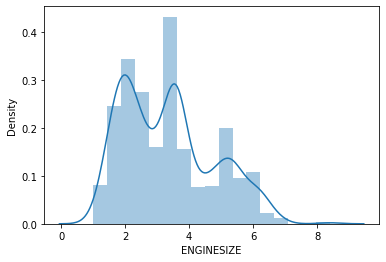

In [19]:
sns.distplot(df['ENGINESIZE'])

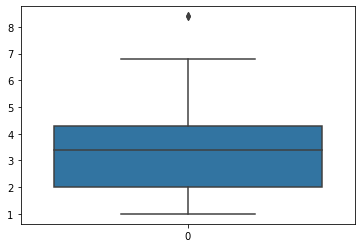

In [20]:
sns.boxplot(data=df['ENGINESIZE'])

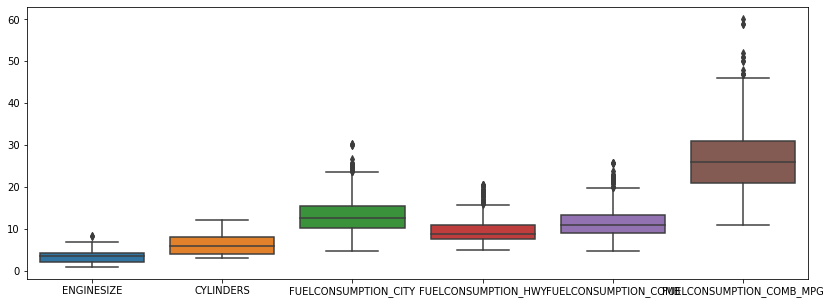

In [21]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))

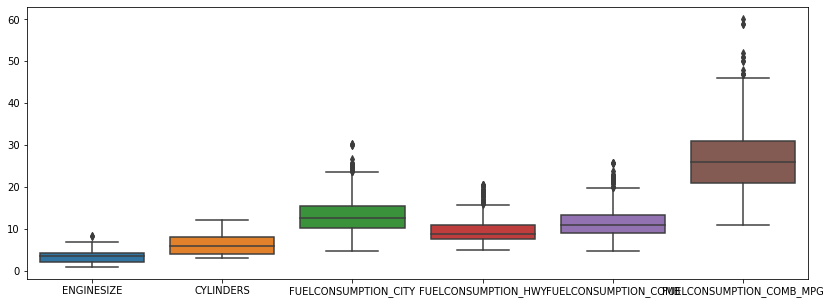

In [22]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.show()

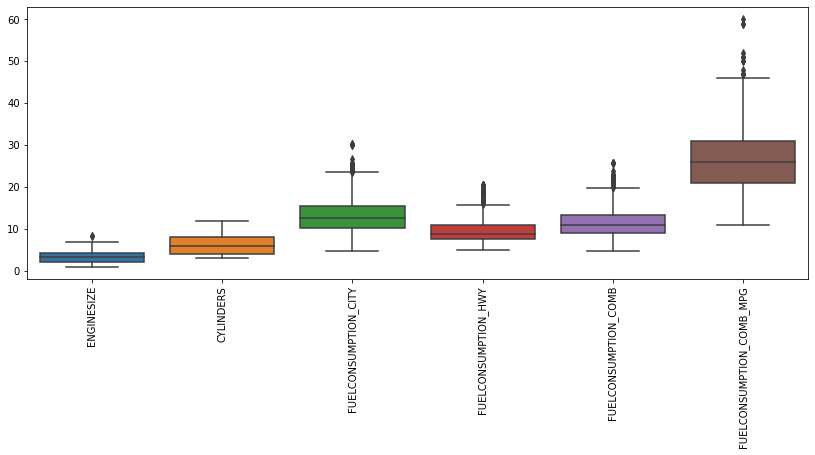

In [23]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.xticks(rotation=90)
plt.show()

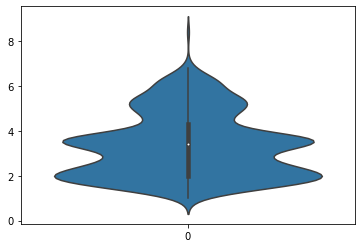

In [24]:
sns.violinplot(data=df['ENGINESIZE'])

### 4. Feature selection

##### - Bước này giảm số features k cần, đc sdung trong pre_train and after that
##### - Feature importance: Decision Tree, Random Forest, XGboost

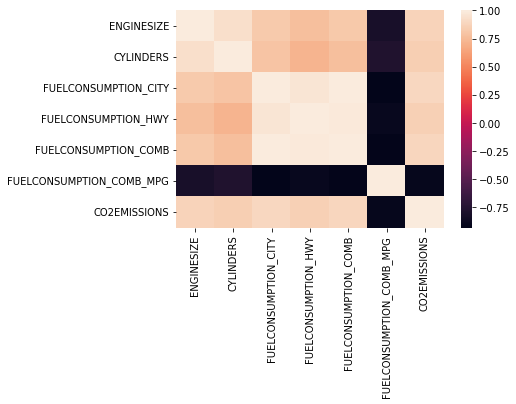

In [26]:
sns.heatmap(df.drop(columns='MODELYEAR').corr())
plt.show()

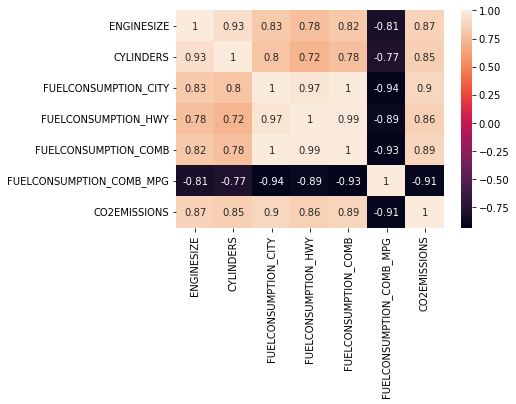

In [27]:
sns.heatmap(df.drop(columns='MODELYEAR').corr(), annot=True)
plt.show()

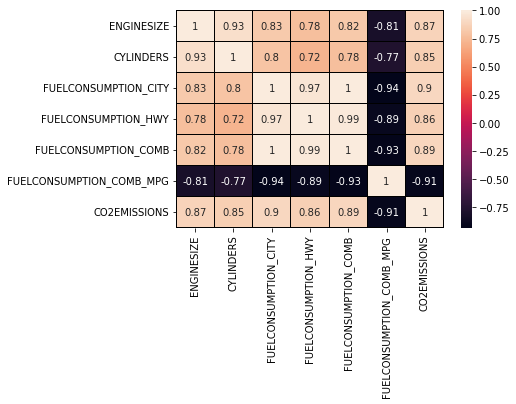

In [28]:
sns.heatmap(df.drop(columns='MODELYEAR').corr(), annot=True, linewidths=0.01, linecolor='black')
plt.show()

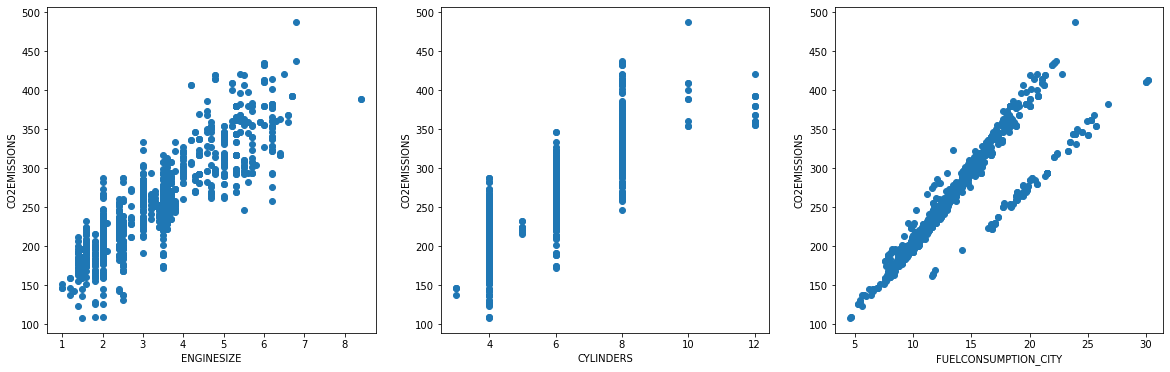

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(df.ENGINESIZE, df.CO2EMISSIONS)                        # ax ~ plot
ax[0].set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS')
ax[1].scatter(df.CYLINDERS, df.CO2EMISSIONS)
ax[1].set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS')
ax[2].scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)
ax[2].set(xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS')
plt.show()

### 5. Train model

In [30]:
# !pip install sklearn

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Model -> fit(data) -> predict

In [33]:
model = LinearRegression()
model.fit(df[['ENGINESIZE']], df['CO2EMISSIONS'])         # fit(feature, label)

LinearRegression()

In [34]:
# calculate a = tan(góc tạo bởi dthang và trục X)
model.coef_

array([39.12519979])

In [35]:
# calculate b
model.intercept_

125.30409949535684

In [36]:
### C1:
prediction = model.predict(df[['ENGINESIZE']])
prediction

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [37]:
### C2: use y = ax + b:
prediction1 = model.coef_[0] * df[['ENGINESIZE']] + model.intercept_
prediction1

,ENGINESIZE
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [38]:
pd.DataFrame({'auto': prediction,
             'manual': prediction1.ENGINESIZE   # prediction1.ENGINESIZE.to_list()
             })

,auto,manual
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


## Evaluation methods:  (These are three useful methods)
![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)
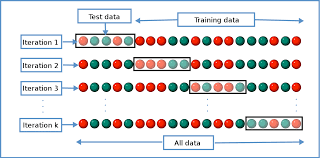
![](https://digitalmind.io/illustrations/post/train-test-split-and-cross-validation/cross-validation.png)

### In Lecture 2,3 we just learn methods 1:
##### search on Sklearn -> model selection

In [39]:
from sklearn.model_selection import train_test_split

#### Hàm train_test_split() chia dữ liệu theo tỉ lệ cta muốn nhưng Random Data
#### But if we use random_state = |any constant| -> we run again -> old results as the first time we ran

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df[['ENGINESIZE']], df.CO2EMISSIONS, test_size=0.2, random_state=42)   # auto if not write train_size/test_size is train/test=0.75/0.25

#### Remember the row of X_train have to equal y_train, and the same for X_test & y_test

In [41]:
X_train.shape, y_train.shape

((853, 1), (853,))

In [42]:
X_test.shape, y_test.shape

((214, 1), (214,))

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
prediction2 = model.predict(X_test)
prediction2

array([309.55670218, 262.76512771, 266.66442558, 243.26863835,
       204.27565962, 243.26863835, 266.66442558, 282.26161707,
       321.2545958 , 266.66442558, 266.66442558, 387.54265963,
       251.06723409, 262.76512771, 266.66442558, 262.76512771,
       188.67846813, 266.66442558, 188.67846813, 332.95248941,
       321.2545958 , 196.47706388, 251.06723409, 270.56372345,
       243.26863835, 196.47706388, 204.27565962, 188.67846813,
       340.75108516, 251.06723409, 336.85178729, 219.87285111,
       196.47706388, 321.2545958 , 243.26863835, 309.55670218,
       282.26161707, 332.95248941, 204.27565962, 223.77214899,
       188.67846813, 188.67846813, 180.87987239, 223.77214899,
       282.26161707, 188.67846813, 243.26863835, 243.26863835,
       204.27565962, 329.05319154, 368.04617027, 266.66442558,
       204.27565962, 270.56372345, 243.26863835, 332.95248941,
       332.95248941, 348.5496809 , 204.27565962, 293.95951069,
       282.26161707, 293.95951069, 297.85880856, 266.66

In [45]:
pd.DataFrame({'auto': prediction2,
             'groundtruth': y_test
             })

,auto,groundtruth
732,309.556702,304
657,262.765128,221
168,266.664426,294
86,243.268638,221
411,204.275660,207
...,...,...
963,204.275660,212
294,219.872851,230
275,219.872851,232
903,243.268638,260


### 6. Evaluation

## Evaluation Metrics:
##### +) Regression: MSE, RMSE, MAE, R2-score
##### +) Classification: Accuracy, Precision, Recall, F1_score, |ROC, AUC, Gini|

##### * MSE = Mean Squared Error
##### * RMSE = Root Mean Squared Error
##### * MAE = Mean Absolute Error
#### --> MSE, RMSE, MAE càng nhỏ càng tốt
##### * R2-score
#### --> R2-score càng lớn càng chính xác

### * MSE:
![](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)
![](https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg)

### * RMSE:
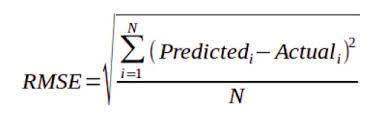

### * MAE:
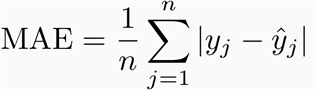

### * R2-score:
![](https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png)

# --> Summary:
![](https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG)

##### Type Markdown and LaTeX: α^2

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
mean_absolute_error(y_test, prediction2)

24.097257411707837

In [48]:
mean_squared_error(y_test, prediction2)

985.9381692274995

In [49]:
r2_score(y_test, prediction2)

0.7615595731934374

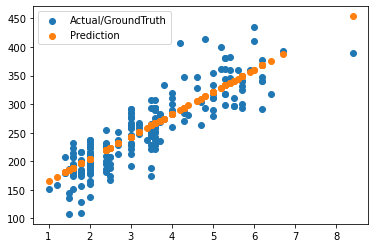

In [51]:
plt.scatter(X_test.ENGINESIZE, y_test, label='Actual/GroundTruth')
plt.scatter(X_test.ENGINESIZE, prediction2, label='Prediction')
plt.legend()                                                                       # để dán nhãn đồ thị
plt.show()

## ** Cost function ~ Lost function ~ Evaluation metrics
#### --> evaluation metrics (after training): chạy model xong (có model rồi) -> chạy trên test result xem model có tốt hay k?
#### --> cost function ~ lost function (during training): trong khi training, tự đánh giá xem tập train đó thì độ sai số/ mất mát là bnhieu & giảm sai số đi nhiều nhất có thể